In [1]:
# import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime as dt

In [2]:
# import the dataset
df= pd.read_excel("C:/Users/pc/Desktop/1/Data Science/cohort/transaction.xlsx")
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000


In [3]:
# check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  float64       
 5   order_status      20000 non-null  object        
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     19803 non-null  float64       
 12  transaction_id.1  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


The dataset consist of 13 columns and 20,000 records, transaction_id, product_id and customer_id columns are of integer data dtype. online_order, list_price, standard_cost, transaction_id columns are of float data type. Amd order_status, brand,product_line, product_class and product_size are object and the transaction_date is a datetime 

In [4]:
# compute the the values and the percentage of the missing values
missing_value = df.isna().sum()
missing_value = missing_value.reset_index().rename(columns={
    
            "index": "Column",
            0:'missing_value'
})


percentage = pd.DataFrame(df.isna().sum() * 100 / df.shape[0],).round(2)
percentage = percentage.reset_index().rename(columns={
    
            "index": "Column",
            0:'Missing_Percentage (%)'
})



Final = missing_value.merge(percentage, how = 'inner', left_on = 'Column', right_on = 'Column')
Final["Missing_Percentage (%..)"] = Final["Missing_Percentage (%)"].astype(str)
Final=Final[Final["missing_value"]>0]
Final

,Column,missing_value,Missing_Percentage (%),Missing_Percentage (%..)
4,online_order,360,1.80,1.8
6,brand,197,0.98,0.98
7,product_line,197,0.98,0.98
8,product_class,197,0.98,0.98
9,product_size,197,0.98,0.98
11,standard_cost,197,0.98,0.98


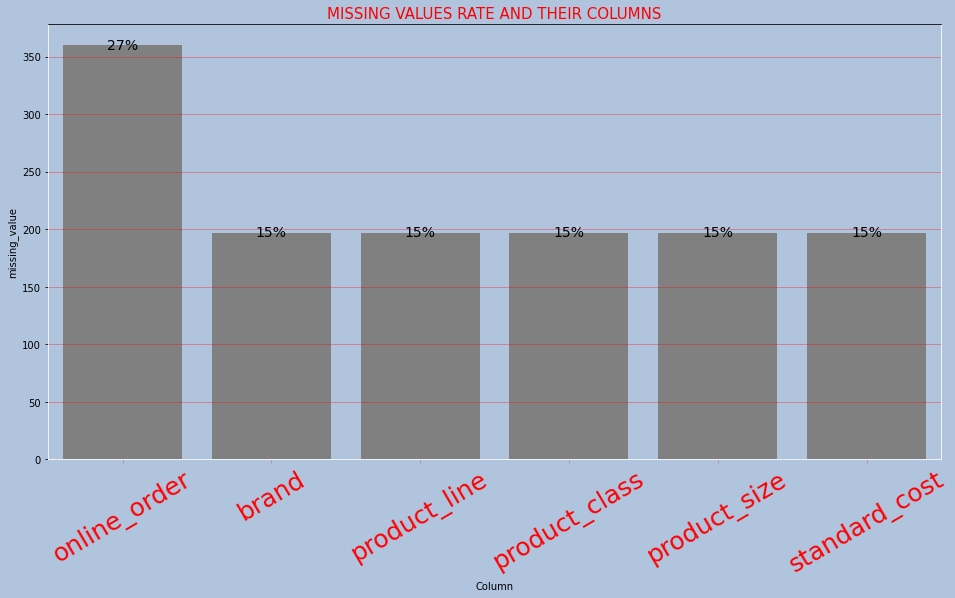

In [5]:
fig, ax = plt.subplots(figsize=(16, 8), facecolor=('#B0C4DE'))
ax.set_facecolor('#B0C4DE')
ax.grid(True, alpha=.4, color="red")
plot = sns.barplot(x=Final.Column, y = Final.missing_value, palette=["grey"])
ax.tick_params(axis="x", color="#BC8F8F", labelrotation=30.5, labelsize= 25, labelcolor="red")
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.set_title("MISSING VALUES RATE AND THEIR COLUMNS", color="red", fontsize= 15)
for p in plot.patches:
    plot.annotate(format(round(p.get_height()/Final.missing_value.values.sum()*100, 2), '.0f')+"%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=14,
                   xytext=(0, 0),
                   textcoords='offset points'
                 )
plt.show()

online_order, brand, product_line, product_class, product_class, product_size,standard_cost columns all contain missing values. each of them will be taken care of later in the notebook

# Treating the missing values

In [6]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000


# online_order column

In [7]:
# filter out when the online_order column is nan, to see reasoning for the nan values
df[df.online_order.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,395.000000
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,4154.666667
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,427.333333
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2476.333333
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,3198.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,-12073.000000
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,-10730.000000
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,-10460.333333
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,-11206.000000


Clearly, it can be seen that the missing values might be because of omission(typing error). So to treating the missing values, I will forward fill the resulting nan values

In [8]:
# forward fill the missing values in the online_order column
df.online_order.ffill(inplace=True)

In [9]:
df.online_order.isna().sum()

0

# brand column

In [10]:
df[df.brand.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,483.333333
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,4293.333333
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,1907.333333
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,3140.666667
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,3027.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,-12303.333333
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,-9713.333333
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,-9382.666667
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,-9949.333333


I filter out when the values is nan in brand column and notice that there are several columns having nan as well, am really sure if this could to as a result of typing errors. But for simplicity, i will fill the missing values with mode 

In [11]:
# fill the missing values with mode
df.brand.fillna(df.brand.mode()[0], inplace=True)

# product_line column

In [12]:
# fill the missing values with mode
df.product_line.fillna(  df.product_line.mode()[0], inplace=True)

# product_class column

In [13]:
# fill the missing values with mode
df.product_class.fillna( df.product_class.mode()[0], inplace=True)

# product_size colums

In [14]:
# fill the missing values with mode

si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df.product_size = si.fit_transform(df[['product_size']])

# product_line column

In [15]:
si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df.product_line = si.fit_transform(df[['product_line']])

# product_class column

In [16]:
df.product_class.fillna( df.product_class.mode()[0] , inplace=True)

# standard_cost column

In [17]:
si = SimpleImputer(missing_values=np.nan, strategy="mean")
df.standard_cost = si.fit_transform(df[['standard_cost']])

In [18]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000


Now the dataset is clean enough, then we can move on the data exploration

# Assigned the cohorts and calculated the monthly offset

In [19]:
# Extrat TransactionMonth column
df["TransactionMonth"] = df.transaction_date.apply(lambda x: dt.datetime( x.year, x.month, 1))

In [20]:
# Extrat CohortMonth column

df["CohortMonth"]= df.groupby("customer_id")["TransactionMonth"].transform(min)


In [21]:
df.loc[df['TransactionMonth'] != df['CohortMonth']].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1,TransactionMonth,CohortMonth
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000,2017-10-01,2017-01-01
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,3123.000000,2017-03-01,2017-02-01


As you can see, customer with Customer_ID 3120 was acquired on January 1, 2017, but transaction number 4848 wasn’t performed until May 5, 2017. The cohort index for the row is the time difference between InvoiceMonth and CohortMonth, and the difference between the dates is calculated by a function that adds 1 to the result in order to start the cohorts at 1 rather than 0 (ie., a transaction made in the same month as the acquisition):

# Calculating time offset in Month as Cohort Index
Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.


Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [22]:
def diff_month(x):

    d1 = x['TransactionMonth']

    d2 = x["CohortMonth"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1


df['CohortIndex'] = df.apply(lambda x: diff_month(x), axis=1)

df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1,TransactionMonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000,2017-10-01,2017-01-01,10


Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

1. CohortMonth to the index parameter,
2. CohortIndex to the columns parameter,
3. customer_id to the values parameter.
4. and rounding it up to 1 digit, and see what we get.

In [23]:
def get_cohort_matrix(data, var='customer_id', fun=pd.Series.nunique):

    cohort_data = data.groupby(["CohortIndex", "CohortMonth"])[var].apply(fun).reset_index()

    cohort_pivot = cohort_data.pivot_table(index = 'CohortMonth',

                        columns = 'CohortIndex',

                        values = var)

    cs = cohort_pivot.iloc[:,0]

    retention = cohort_pivot.divide(cs, axis = 0)

    retention = retention.round(3) * 100

    return cohort_pivot, retention

In [24]:
cc, retention = get_cohort_matrix(df)

cc

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate business metrics: Retention rate
The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

Retention tables show a group of people that visited your site or used your app for the first time during a certain time frame. They also display the progressive ‘drop-off’ or decline in activity over time for that particular group (a cohort).

Marketers can use Retention tables to analyze the quality of users brought by a marketing campaign and compare it to other sources of traffic.

*https://www.smartlook.com/blog/retention-tables-introduction/

In [25]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

- Index value represents the Cohort
- Columns represent the number of months since the current Cohort


**For instance:** The value at CohortMonth **2017-01-01,** CohortIndex **3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.**

Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

# Visualizing the retention rate
Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

In [26]:
average_standard_cost=retention
average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')

average_standard_cost

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


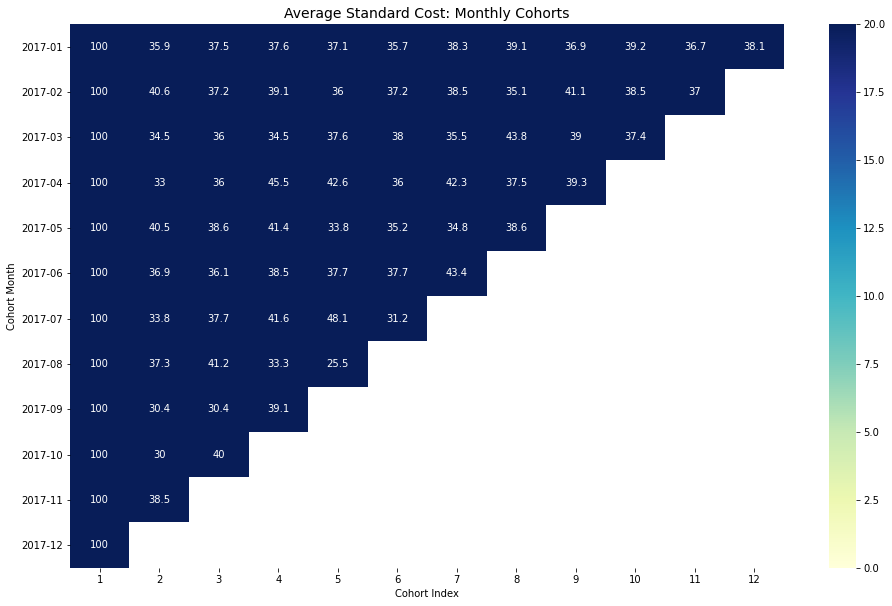

In [27]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(average_standard_cost, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.
____________________________________________
Here, We have 12 cohorts for each month and 12 cohort indexes. The darker the blue shades higher the values. Thus, if we see in 2017-07 cohort Month in 5th Cohort Index, we see the dark blue shade with  48% which means that 48% of cohorts that signed in July 2017 were active 5 months later.
